# Imports


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Funciones Auxiliares


In [3]:
def time_to_seconds(t):
    """
    Converts a time in the format mm:ss.xx to total seconds.

        Args:
            t (str): Time in format mm:ss.xx or just seconds

        Returns:
            float: Total time in seconds, or None if input is NaN
    """
    if pd.isna(t):
        return None
    parts = t.split(':')
    if len(parts) == 2:
        minutes = int(parts[0])
        seconds = float(parts[1])
        return minutes * 60 + seconds
    else:
        return float(t)

# Escalabilidad Mononodo


## Nativo: Subpopulations Fijo vs Subpopulations Variable


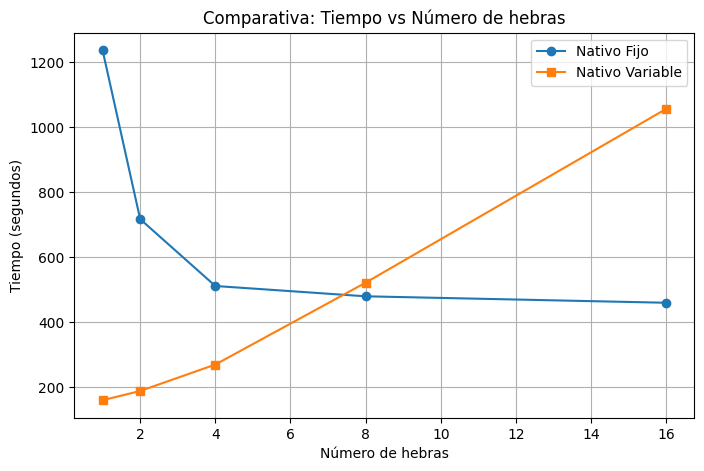

In [4]:
# Load CSVs
df_single_node_native_fixed = pd.read_csv('../results/scalability_single-node_native_subpop-fixed.csv')
df_single_node_native_variable = pd.read_csv('../results/scalability_single-node_native_subpop-variable.csv')

# Convert time columns to seconds
df_single_node_native_fixed['time_seconds'] = df_single_node_native_fixed['time'].apply(time_to_seconds)
df_single_node_native_variable['time_seconds'] = df_single_node_native_variable['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_single_node_native_fixed['threads'], df_single_node_native_fixed['time_seconds'], marker='o', label='Nativo Fijo')
plt.plot(df_single_node_native_variable['threads'], df_single_node_native_variable['time_seconds'], marker='s', label='Nativo Variable')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparativa: Tiempo vs Número de hebras')
plt.legend()
plt.grid(True)
plt.show()

## Nativo: Tiempo de ejecución vs Número de hebras


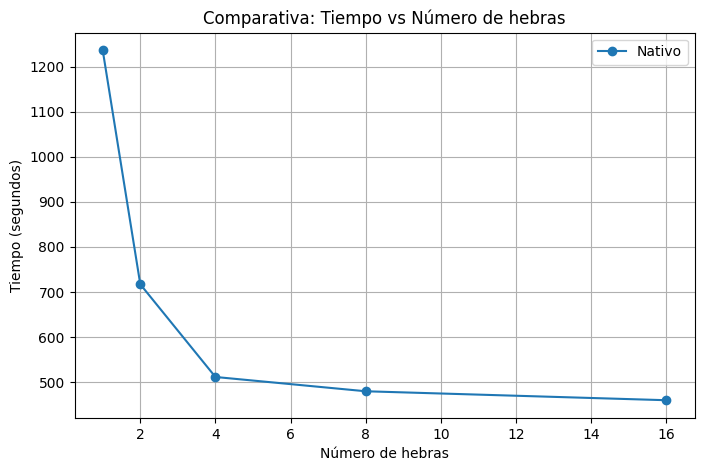

In [5]:
# Load CSVs
df_single_node_native = pd.read_csv('../results/scalability_single-node_native.csv')

# Convert time columns to seconds
df_single_node_native['time_seconds'] = df_single_node_native['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_single_node_native['threads'], df_single_node_native['time_seconds'], marker='o', label='Nativo')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparativa: Tiempo vs Número de hebras')
plt.legend()
plt.grid(True)
plt.show()

## Nativo: Porcentaje de uso de CPU vs Número de hebras


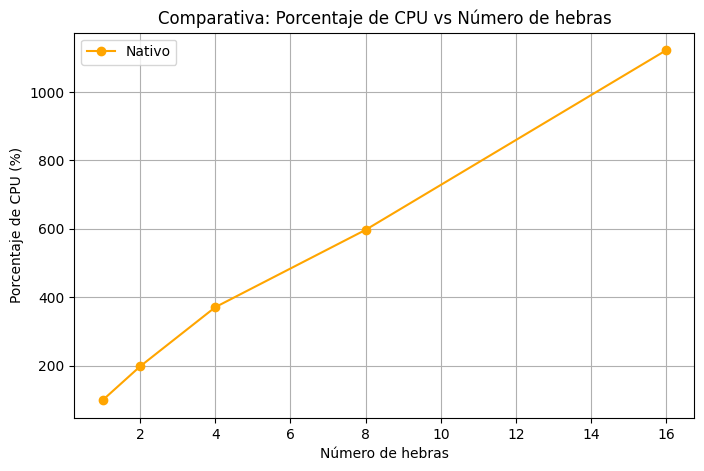

In [6]:
# Graficar número de hebras vs porcentaje de CPU
plt.figure(figsize=(8, 5))
plt.plot(df_single_node_native_fixed['threads'], df_single_node_native_fixed['cpu_percentage'], marker='o', color='orange', label='Nativo')
plt.xlabel('Número de hebras')
plt.ylabel('Porcentaje de CPU (%)')
plt.title('Comparativa: Porcentaje de CPU vs Número de hebras')
plt.grid(True)
plt.legend()
plt.show()

## Nativo vs Docker


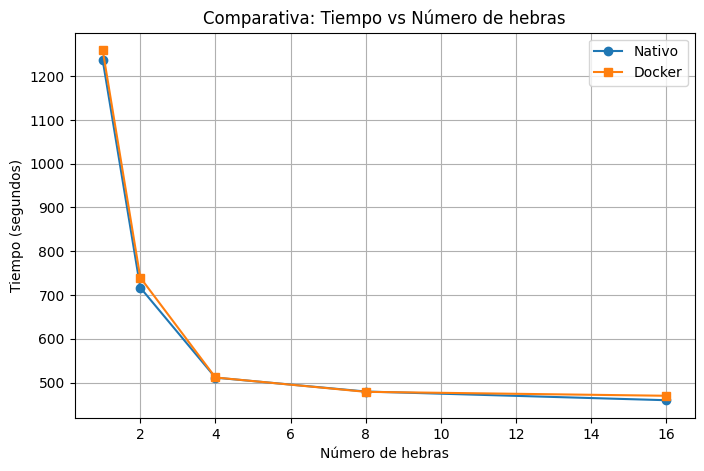

In [7]:
# Load CSVs
df_single_node_native = pd.read_csv('../results/scalability_single-node_native.csv')
df_single_node_docker = pd.read_csv('../results/scalability_single-node_docker.csv')

# Convert time columns to seconds
df_single_node_native['time_seconds'] = df_single_node_native['time'].apply(time_to_seconds)
df_single_node_docker['time_seconds'] = df_single_node_docker['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_single_node_native['threads'], df_single_node_native['time_seconds'], marker='o', label='Nativo')
plt.plot(df_single_node_docker['threads'], df_single_node_docker['time_seconds'], marker='s', label='Docker')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparativa: Tiempo vs Número de hebras')
plt.legend()
plt.grid(True)
plt.show()

# Escalabilidad Multinodo


## Nativo: Tiempo de Ejecución vs Número de Nodos


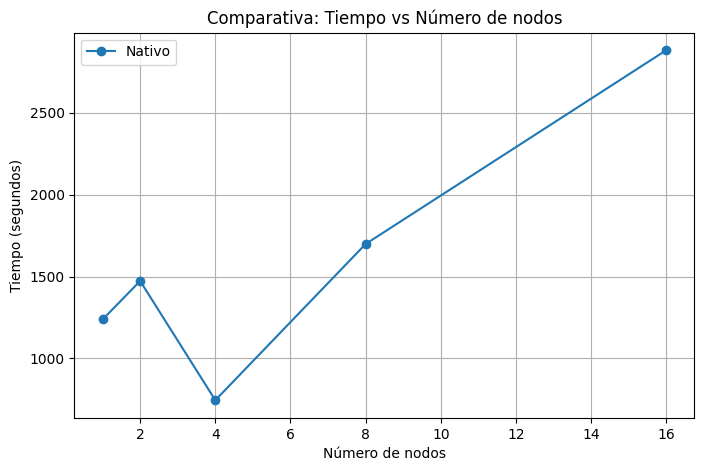

In [8]:
# Load CSVs
df_multi_node_native = pd.read_csv('../results/scalability_multi-node_native.csv')

# Convert time columns to seconds
df_multi_node_native['time_seconds'] = df_multi_node_native['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_multi_node_native['nodes'], df_multi_node_native['time_seconds'], marker='o', label='Nativo')
plt.xlabel('Número de nodos')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparativa: Tiempo vs Número de nodos')
plt.legend()
plt.grid(True)
plt.show()

## Nativo: Porcentaje de uso de CPU vs Número de nodos


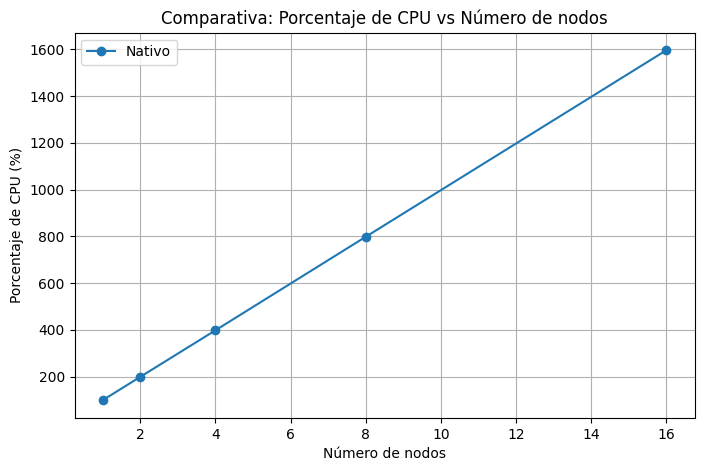

In [9]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_multi_node_native['nodes'], df_multi_node_native['cpu_percentage'], marker='o', label='Nativo')
plt.xlabel('Número de nodos')
plt.ylabel('Porcentaje de CPU (%)')
plt.title('Comparativa: Porcentaje de CPU vs Número de nodos')
plt.legend()
plt.grid(True)
plt.show()

## Nativo vs Docker


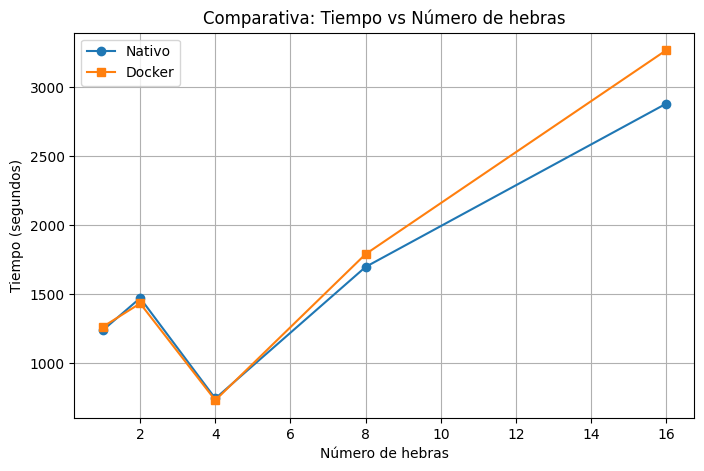

In [10]:
# Load CSVs
df_multi_node_docker = pd.read_csv('../results/scalability_multi-node_docker.csv')

# Convert time columns to seconds
df_multi_node_docker['time_seconds'] = df_multi_node_docker['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_multi_node_native['nodes'], df_multi_node_native['time_seconds'], marker='o', label='Nativo')
plt.plot(df_multi_node_docker['nodes'], df_multi_node_docker['time_seconds'], marker='s', label='Docker')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparativa: Tiempo vs Número de hebras')
plt.legend()
plt.grid(True)
plt.show()

# Escalabilidad Mononodo vs Multinodo


## Local


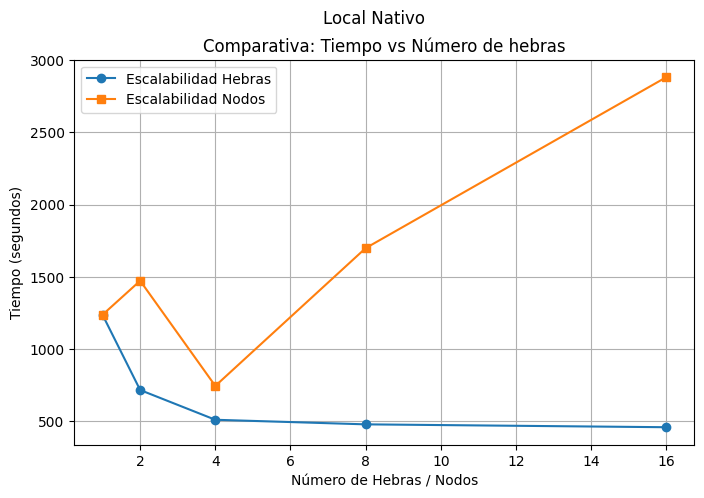

In [11]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_single_node_native['threads'], df_single_node_native['time_seconds'], marker='o', label='Escalabilidad Hebras')
plt.plot(df_multi_node_native['nodes'], df_multi_node_native['time_seconds'], marker='s', label='Escalabilidad Nodos')
plt.xlabel('Número de Hebras / Nodos')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparativa: Tiempo vs Número de hebras')
plt.suptitle('Local Nativo')
plt.legend()
plt.grid(True)
plt.show()

# Escalabilidad Multinodo Barrido de Hebras


## Nativo


/tmp/ipykernel_48519/159350776.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodes_1['time_seconds'] = df_nodes_1['time'].apply(time_to_seconds)


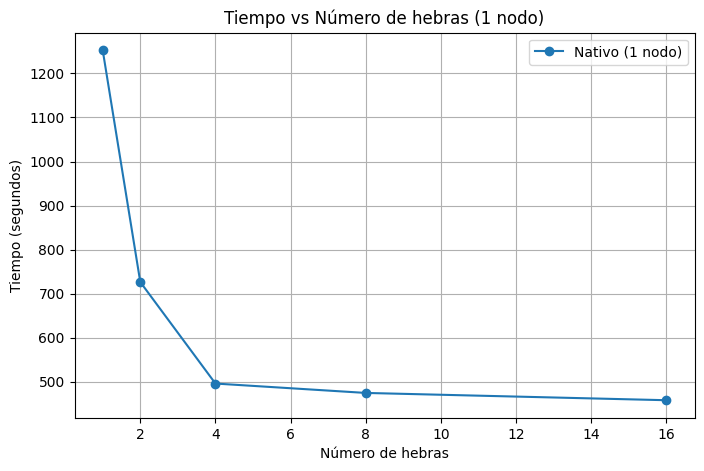

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_native = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')

# Filter to only show rows where nodes == 1
df_nodes_1_native = df_multi_node_sweep_threads_native[df_multi_node_sweep_threads_native['nodes'] == 1]

# Convert time columns to seconds
df_nodes_1_native['time_seconds'] = df_nodes_1_native['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_1_native['threads'], df_nodes_1_native['time_seconds'], marker='o', label='Nativo (1 nodo)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (1 nodo)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_48519/3718666142.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodes_2['time_seconds'] = df_nodes_2['time'].apply(time_to_seconds)


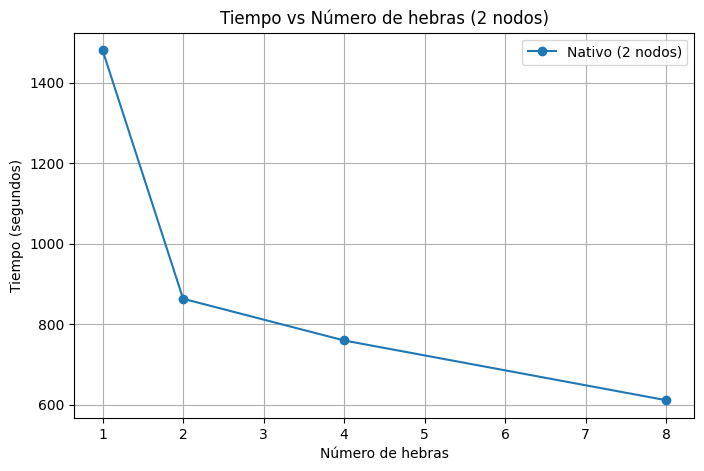

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_native = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')

# Filter to only show rows where nodes == 2
df_nodes_2_native = df_multi_node_sweep_threads_native[df_multi_node_sweep_threads_native['nodes'] == 2]

# Convert time columns to seconds
df_nodes_2_native['time_seconds'] = df_nodes_2_native['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_2_native['threads'], df_nodes_2_native['time_seconds'], marker='o', label='Nativo (2 nodos)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (2 nodos)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_48519/430880203.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodes_4['time_seconds'] = df_nodes_4['time'].apply(time_to_seconds)


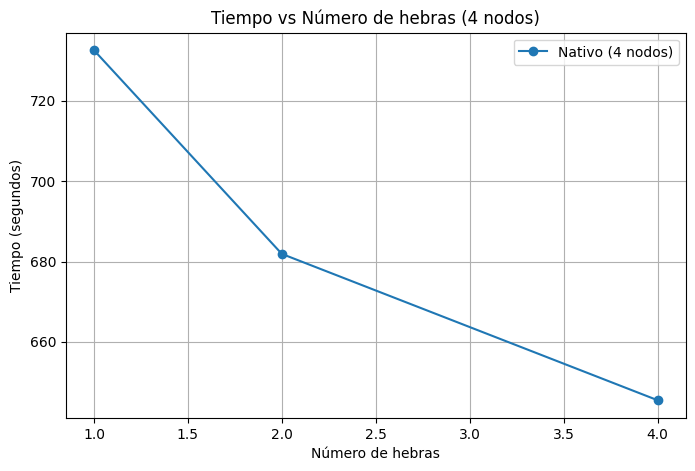

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_native = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')

# Filter to only show rows where nodes == 4
df_nodes_4_native = df_multi_node_sweep_threads_native[df_multi_node_sweep_threads_native['nodes'] == 4]

# Convert time columns to seconds
df_nodes_4_native['time_seconds'] = df_nodes_4_native['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_4_native['threads'], df_nodes_4_native['time_seconds'], marker='o', label='Nativo (4 nodos)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (4 nodos)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_48519/3815363275.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodes_8['time_seconds'] = df_nodes_8['time'].apply(time_to_seconds)


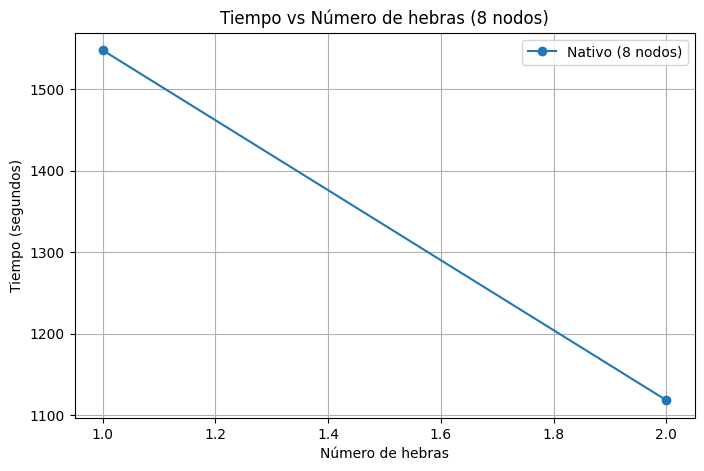

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_native = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')

# Filter to only show rows where nodes == 8
df_nodes_8_native = df_multi_node_sweep_threads_native[df_multi_node_sweep_threads_native['nodes'] == 8]

# Convert time columns to seconds
df_nodes_8_native['time_seconds'] = df_nodes_8_native['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_8_native['threads'], df_nodes_8_native['time_seconds'], marker='o', label='Nativo (8 nodos)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (8 nodos)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_48519/2820670796.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodes_16['time_seconds'] = df_nodes_16['time'].apply(time_to_seconds)


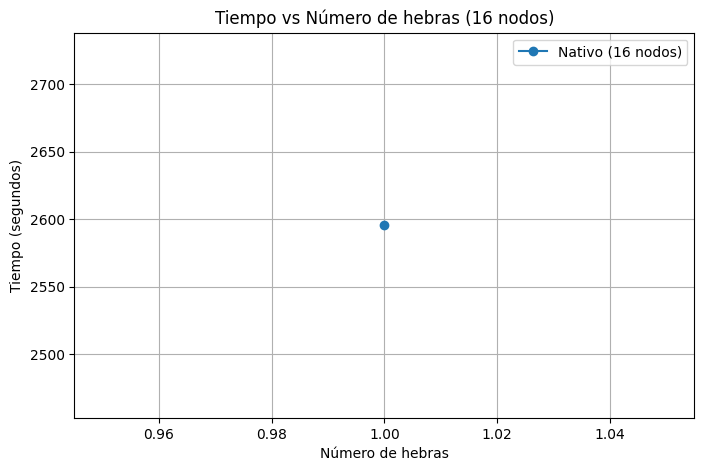

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_native = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')

# Filter to only show rows where nodes == 16
df_nodes_16_native = df_multi_node_sweep_threads_native[df_multi_node_sweep_threads_native['nodes'] == 16]

# Convert time columns to seconds
df_nodes_16_native['time_seconds'] = df_nodes_16_native['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_16_native['threads'], df_nodes_16_native['time_seconds'], marker='o', label='Nativo (16 nodos)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (16 nodos)')
plt.legend()
plt.grid(True)
plt.show()

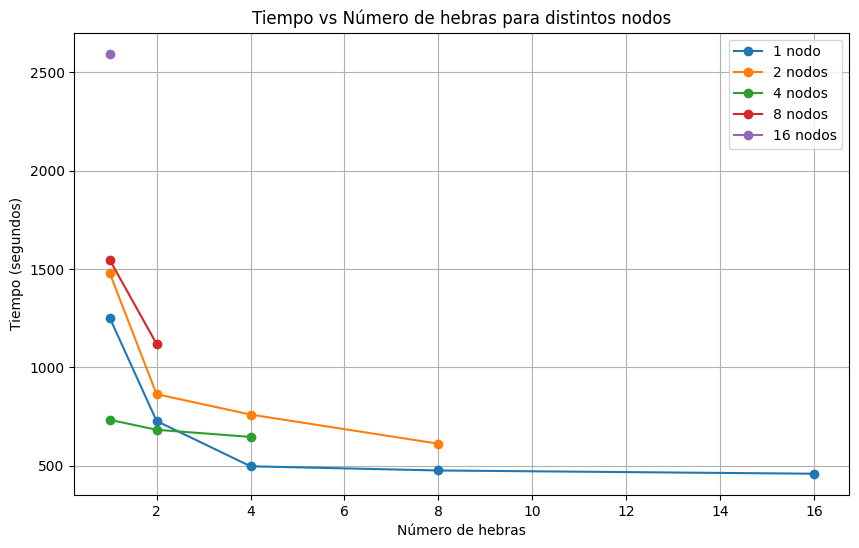

In [18]:
# Load CSVs
df_multi_node_sweep_threads_native = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')

# Convert time columns to seconds
df_multi_node_sweep_threads_native['time_seconds'] = df_multi_node_sweep_threads_native['time'].apply(time_to_seconds)

# Plotting: compare all nodes (1, 2, 4, 8, 16)
plt.figure(figsize=(10, 6))
for n in [1, 2, 4, 8, 16]:
    df_n = df_multi_node_sweep_threads_native[df_multi_node_sweep_threads_native['nodes'] == n]
    plt.plot(df_n['threads'], df_n['time_seconds'], marker='o', label=f'{n} nodo{"s" if n > 1 else ""}')

plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras para distintos nodos')
plt.legend()
plt.grid(True)
plt.show()

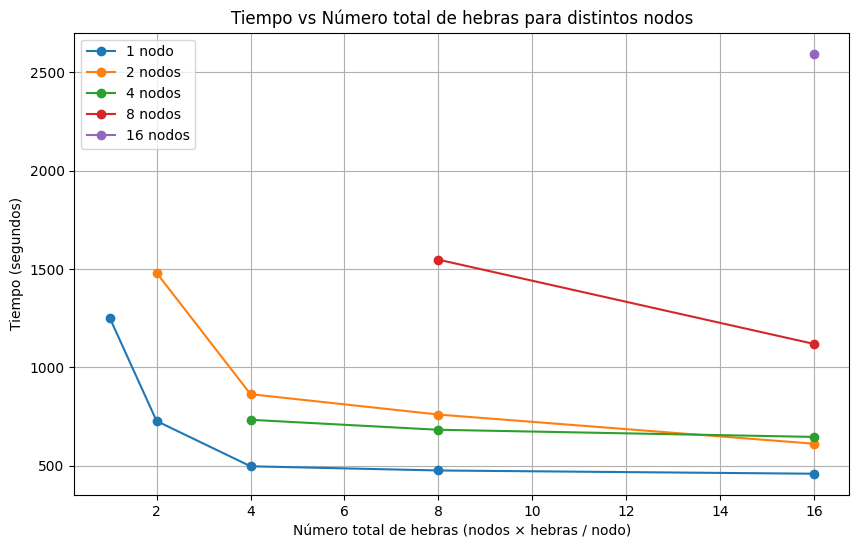

In [25]:
# Load CSVs
df_multi_node_sweep_threads_native = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')

# Crear columna con el número total de hebras (nodos * hebras)
df_multi_node_sweep_threads_native['total_threads'] = df_multi_node_sweep_threads_native['nodes'] * df_multi_node_sweep_threads_native['threads']

# Convertir columna de tiempo a segundos
df_multi_node_sweep_threads_native['time_seconds'] = df_multi_node_sweep_threads_native['time'].apply(time_to_seconds)

# Graficar: Tiempo vs Número total de hebras, agrupando por nodos
plt.figure(figsize=(10, 6))
for n in [1, 2, 4, 8, 16]:
    df_n = df_multi_node_sweep_threads_native[df_multi_node_sweep_threads_native['nodes'] == n]
    plt.plot(df_n['total_threads'], df_n['time_seconds'], marker='o', label=f'{n} nodo{"s" if n > 1 else ""}')

plt.xlabel('Número total de hebras (nodos × hebras / nodo)')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número total de hebras para distintos nodos')
plt.legend()
plt.grid(True)
plt.show()

## Docker


/tmp/ipykernel_48519/3776711903.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodes_1_docker['time_seconds'] = df_nodes_1_docker['time'].apply(time_to_seconds)


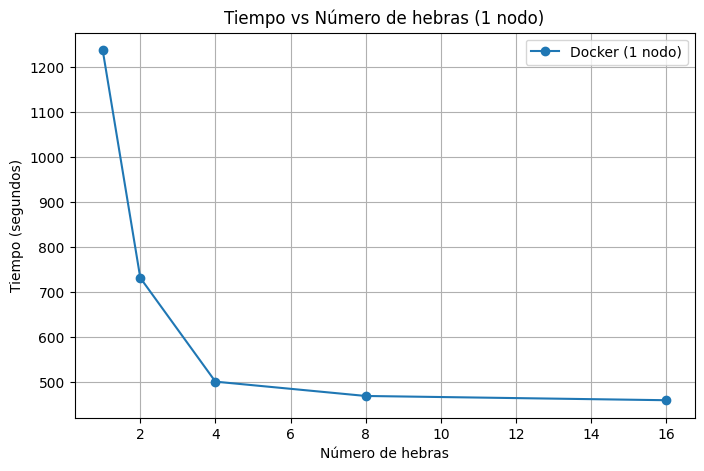

In [20]:
# Load CSVs
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_docker.csv')

# Filter to only show rows where nodes == 1
df_nodes_1_docker = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == 1]

# Convert time columns to seconds
df_nodes_1_docker['time_seconds'] = df_nodes_1_docker['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_1_docker['threads'], df_nodes_1_docker['time_seconds'], marker='o', label='Docker (1 nodo)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (1 nodo)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_48519/3099732139.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodes_2_docker['time_seconds'] = df_nodes_2_docker['time'].apply(time_to_seconds)


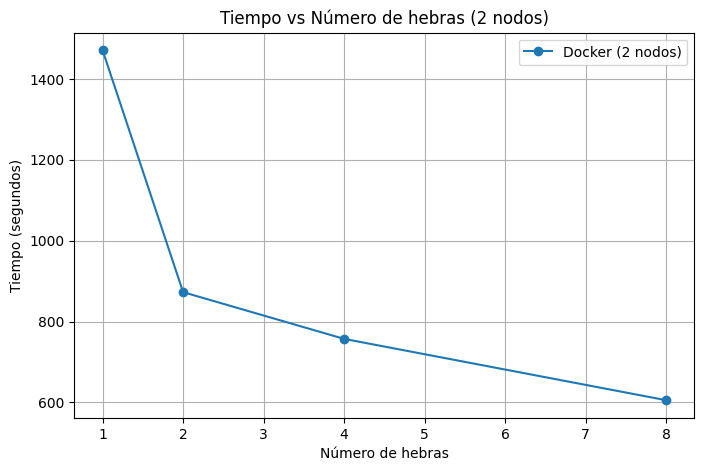

In [21]:
# Load CSVs
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_docker.csv')

# Filter to only show rows where nodes == 2
df_nodes_2_docker = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == 2]

# Convert time columns to seconds
df_nodes_2_docker['time_seconds'] = df_nodes_2_docker['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_2_docker['threads'], df_nodes_2_docker['time_seconds'], marker='o', label='Docker (2 nodos)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (2 nodos)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_48519/1548939894.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodes_4_docker['time_seconds'] = df_nodes_4_docker['time'].apply(time_to_seconds)


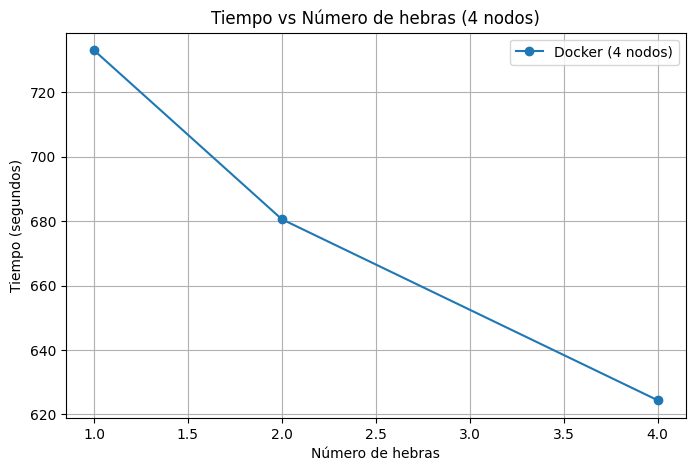

In [22]:
# Load CSVs
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_docker.csv')

# Filter to only show rows where nodes == 4
df_nodes_4_docker = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == 4]

# Convert time columns to seconds
df_nodes_4_docker['time_seconds'] = df_nodes_4_docker['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_4_docker['threads'], df_nodes_4_docker['time_seconds'], marker='o', label='Docker (4 nodos)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (4 nodos)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_48519/2037687382.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodes_8_docker['time_seconds'] = df_nodes_8_docker['time'].apply(time_to_seconds)


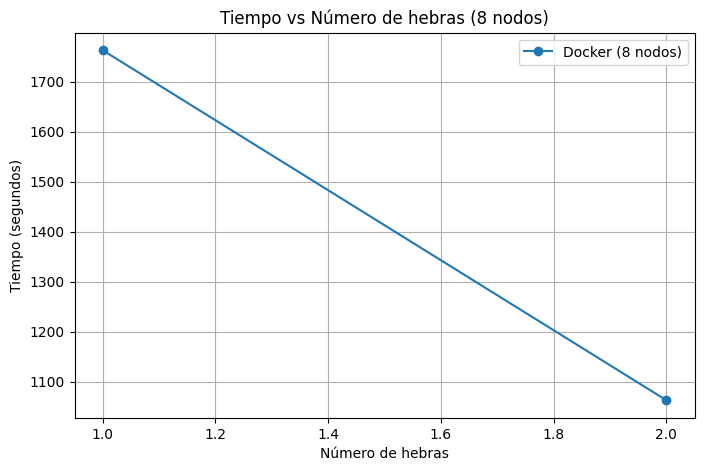

In [23]:
# Load CSVs
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_docker.csv')

# Filter to only show rows where nodes == 8
df_nodes_8_docker = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == 8]

# Convert time columns to seconds
df_nodes_8_docker['time_seconds'] = df_nodes_8_docker['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_8_docker['threads'], df_nodes_8_docker['time_seconds'], marker='o', label='Docker (8 nodos)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (8 nodos)')
plt.legend()
plt.grid(True)
plt.show()

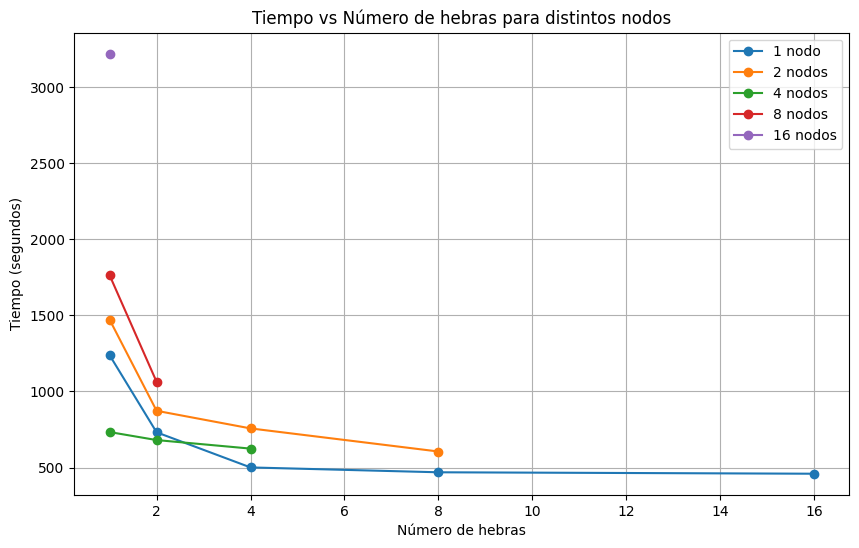

In [24]:
# Load CSVs
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_docker.csv')

# Convert time columns to seconds
df_multi_node_sweep_threads_docker['time_seconds'] = df_multi_node_sweep_threads_docker['time'].apply(time_to_seconds)

# Plotting: compare all nodes (1, 2, 4, 8, 16)
plt.figure(figsize=(10, 6))
for n in [1, 2, 4, 8, 16]:
    df_n = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == n]
    plt.plot(df_n['threads'], df_n['time_seconds'], marker='o', label=f'{n} nodo{"s" if n > 1 else ""}')

plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras para distintos nodos')
plt.legend()
plt.grid(True)
plt.show()

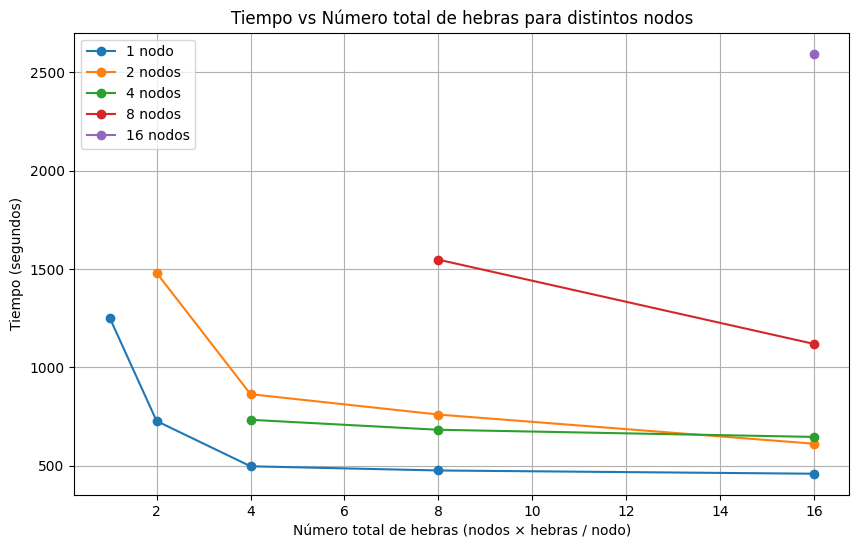

In [26]:
# Load CSVs
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')

# Crear columna con el número total de hebras (nodos * hebras)
df_multi_node_sweep_threads_docker['total_threads'] = df_multi_node_sweep_threads_docker['nodes'] * df_multi_node_sweep_threads_docker['threads']

# Convertir columna de tiempo a segundos
df_multi_node_sweep_threads_docker['time_seconds'] = df_multi_node_sweep_threads_docker['time'].apply(time_to_seconds)

# Graficar: Tiempo vs Número total de hebras, agrupando por nodos
plt.figure(figsize=(10, 6))
for n in [1, 2, 4, 8, 16]:
    df_n = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == n]
    plt.plot(df_n['total_threads'], df_n['time_seconds'], marker='o', label=f'{n} nodo{"s" if n > 1 else ""}')

plt.xlabel('Número total de hebras (nodos × hebras / nodo)')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número total de hebras para distintos nodos')
plt.legend()
plt.grid(True)
plt.show()

## Nativo vs Docker


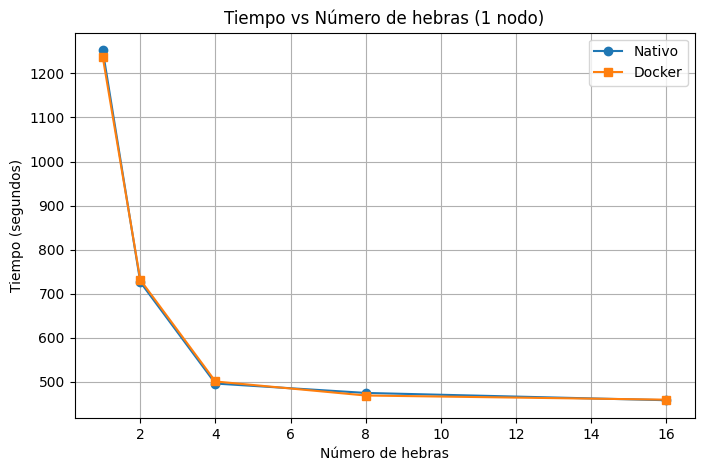

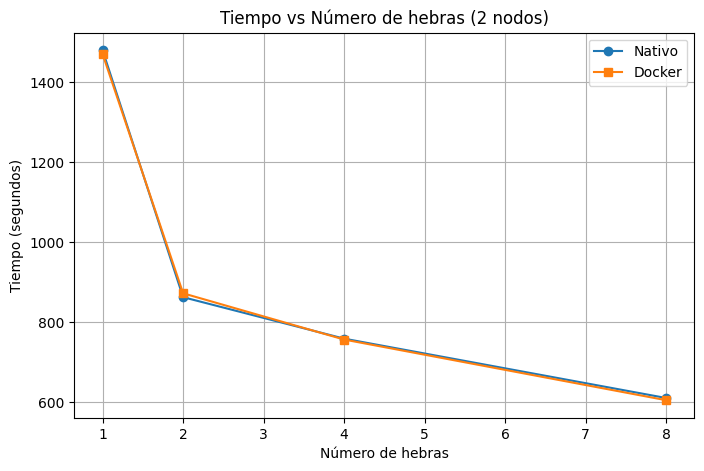

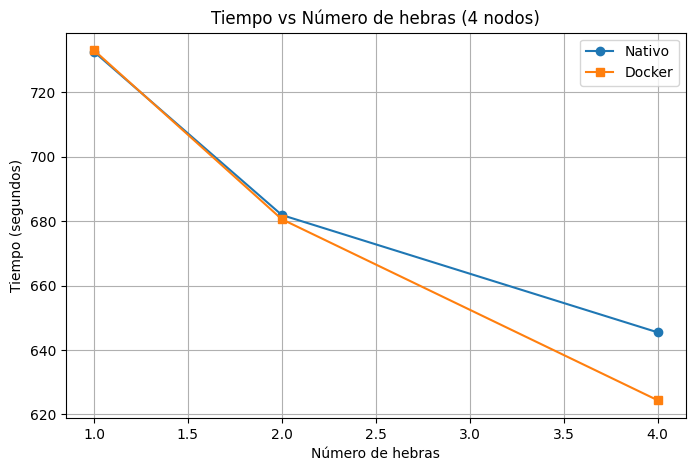

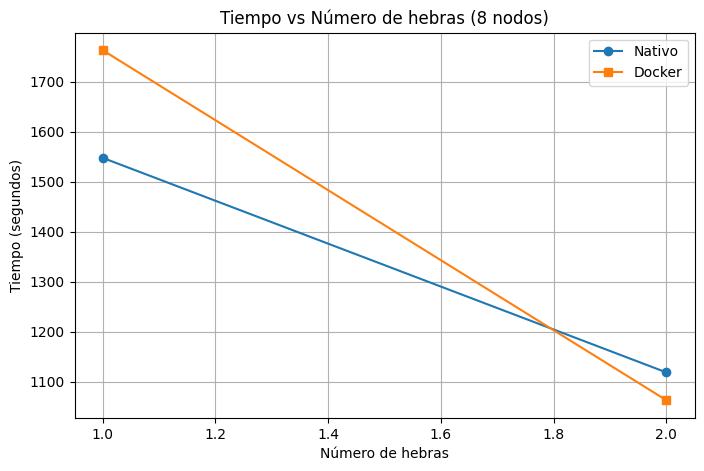

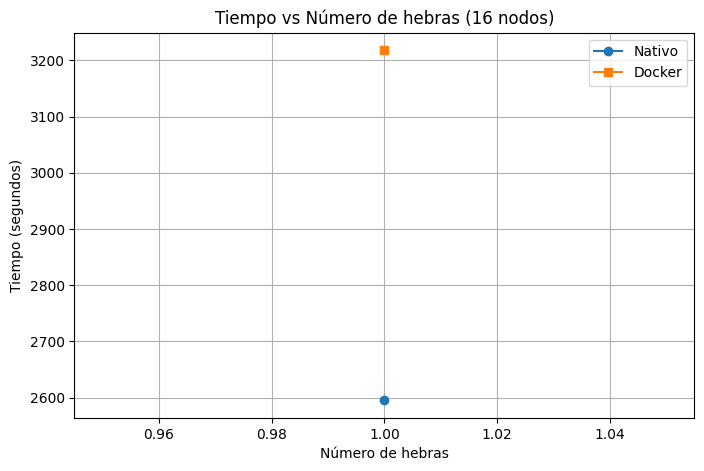

In [ ]:
# Comparación multinodo barrido de hebras: Nativo vs Docker

# Cargar datos
df_multi_node_sweep_threads_native = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_docker.csv')

# Convertir columna de tiempo a segundos
df_multi_node_sweep_threads_native['time_seconds'] = df_multi_node_sweep_threads_native['time'].apply(time_to_seconds)
df_multi_node_sweep_threads_docker['time_seconds'] = df_multi_node_sweep_threads_docker['time'].apply(time_to_seconds)

# Graficar comparación para cada número de nodos
for n in [1, 2, 4, 8, 16]:
    df_n_native = df_multi_node_sweep_threads_native[df_multi_node_sweep_threads_native['nodes'] == n]
    df_n_docker = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == n]

    plt.figure(figsize=(8, 5))
    plt.plot(df_n_native['threads'], df_n_native['time_seconds'], marker='o', label='Nativo')
    plt.plot(df_n_docker['threads'], df_n_docker['time_seconds'], marker='s', label='Docker')
    plt.xlabel('Número de hebras')
    plt.ylabel('Tiempo (segundos)')
    plt.title(f'Tiempo vs Número de hebras ({n} nodo{"s" if n > 1 else ""})')
    plt.legend()
    plt.grid(True)
    plt.show()

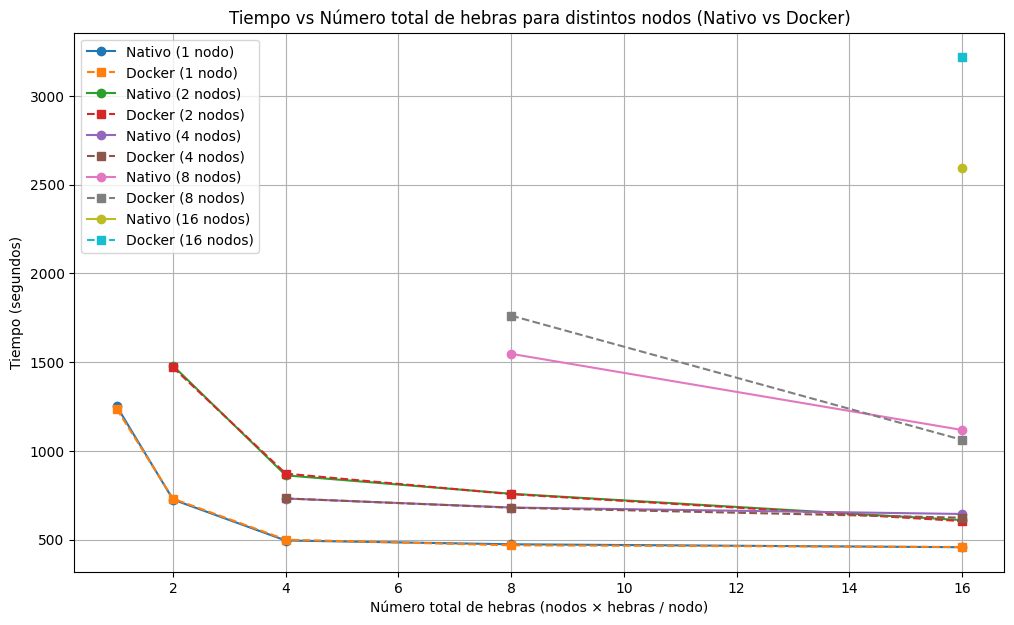

In [28]:
# Comparación multinodo barrido de hebras: Nativo vs Docker (todas las gráficas juntas, eje x = número total de hebras)

# Cargar datos
df_multi_node_sweep_threads_native = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_docker.csv')

# Crear columna con el número total de hebras (nodos * hebras)
df_multi_node_sweep_threads_native['total_threads'] = df_multi_node_sweep_threads_native['nodes'] * df_multi_node_sweep_threads_native['threads']
df_multi_node_sweep_threads_docker['total_threads'] = df_multi_node_sweep_threads_docker['nodes'] * df_multi_node_sweep_threads_docker['threads']

# Convertir columna de tiempo a segundos
df_multi_node_sweep_threads_native['time_seconds'] = df_multi_node_sweep_threads_native['time'].apply(time_to_seconds)
df_multi_node_sweep_threads_docker['time_seconds'] = df_multi_node_sweep_threads_docker['time'].apply(time_to_seconds)

# Graficar: Tiempo vs Número total de hebras, agrupando por nodos y comparando nativo vs docker
plt.figure(figsize=(12, 7))
for n in [1, 2, 4, 8, 16]:
    df_n_native = df_multi_node_sweep_threads_native[df_multi_node_sweep_threads_native['nodes'] == n]
    df_n_docker = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == n]
    plt.plot(df_n_native['total_threads'], df_n_native['time_seconds'], marker='o', label=f'Nativo ({n} nodo{"s" if n > 1 else ""})')
    plt.plot(df_n_docker['total_threads'], df_n_docker['time_seconds'], marker='s', linestyle='--', label=f'Docker ({n} nodo{"s" if n > 1 else ""})')

plt.xlabel('Número total de hebras (nodos × hebras / nodo)')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número total de hebras para distintos nodos (Nativo vs Docker)')
plt.legend()
plt.grid(True)
plt.show()